In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
path='./data/'
files=os.listdir(path)
data=pd.DataFrame()

### 22号到26号的数据缺失，已在文件夹中删除

In [6]:
for file in files:
    tmp=pd.read_csv(path+file)
    name=file.split('.')[0].split('_')[2]
    data[name]=tmp['广州']

In [7]:
tmp=pd.read_csv('./data/china_cities_20180101.csv')

In [8]:
data.index=tmp['type']

In [9]:
data1=data.T

In [10]:
data1.head()

type,AQI,PM2.5,PM2.5_24h,PM10,PM10_24h,SO2,SO2_24h,NO2,NO2_24h,O3,...,SO2,SO2_24h,NO2,NO2_24h,O3,O3_24h,O3_8h,O3_8h_24h,CO,CO_24h
20180101,100.0,75.0,45.0,100.0,69.0,16.0,12.0,68.0,37.0,39.0,...,22.0,15.0,105.0,68.0,13.0,100.0,42.0,83.0,1.500,1.164
20180102,139.0,106.0,84.0,145.0,113.0,23.0,16.0,99.0,69.0,12.0,...,18.0,18.0,115.0,85.0,11.0,94.0,39.0,71.0,1.750,1.400
20180103,141.0,107.0,92.0,158.0,125.0,16.0,18.0,105.0,86.0,11.0,...,24.0,20.0,98.0,88.0,10.0,225.0,89.0,141.0,1.564,1.391
20180104,135.0,102.0,96.0,133.0,125.0,24.0,21.0,94.0,88.0,10.0,...,15.0,19.0,82.0,80.0,8.0,160.0,60.0,117.0,0.782,1.136
20180105,60.0,37.0,67.0,68.0,101.0,14.0,18.0,81.0,80.0,6.0,...,9.0,12.0,44.0,54.0,4.0,19.0,7.0,15.0,1.245,1.109


In [16]:
data2=data1.iloc[:,[0,2,4,6,8,10,14]]

In [17]:
data2.head()

type,AQI,PM2.5_24h,PM10_24h,SO2_24h,NO2_24h,O3_24h,CO_24h
20180101,100.0,45.0,69.0,12.0,37.0,128.0,0.945
20180102,139.0,84.0,113.0,16.0,69.0,100.0,1.182
20180103,141.0,92.0,125.0,18.0,86.0,95.0,1.373
20180104,135.0,96.0,125.0,21.0,88.0,225.0,1.400
20180105,60.0,67.0,101.0,18.0,80.0,160.0,1.109


In [33]:
data2.dropna(how='any',inplace=True)

D:\Anaconda3\envs\Keras\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
def smooth(a,WSZ): 
    # a: NumPy 1-D array containing the data to be smoothed 
    # WSZ: smoothing window size needs, which must be odd number, 
    # as in the original MATLAB implementation 
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ  
    r = np.arange(1,WSZ-1,2) 
    start = np.cumsum(a[:WSZ-1])[::2]/r 
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1] 
    return np.concatenate(( start , out0, stop )) 

In [56]:
data2AQI_mean=smooth(data2['AQI'],7)
data2PM25_24h_mean=smooth(data2['PM2.5_24h'],7)
data2PM10_24h_mean=smooth(data2['PM10_24h'],7)
data2SO2_24h_mean=smooth(data2['SO2_24h'],7)
data2NO2_24h_mean=smooth(data2['NO2_24h'],7)
data2O3_24h_mean=smooth(data2['O3_24h'],7)
data2CO_24h_mean=smooth(data2['CO_24h'],7)

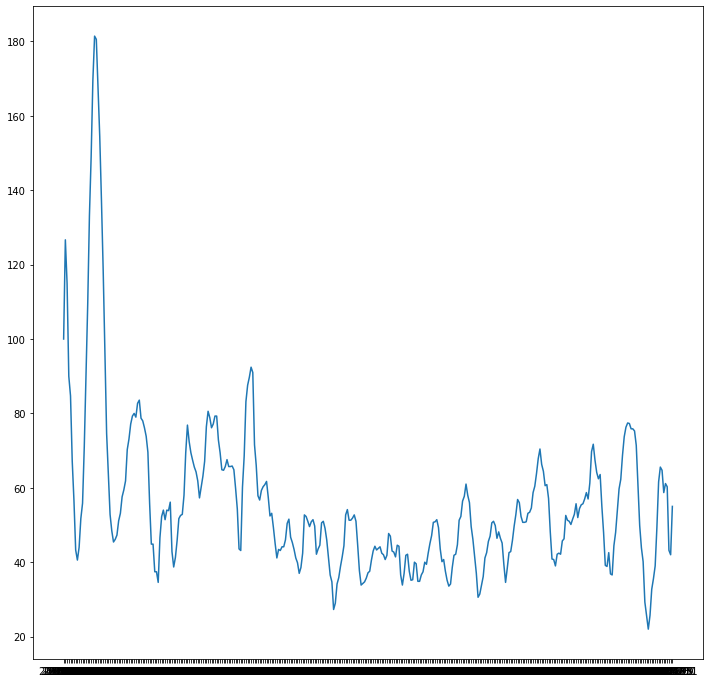

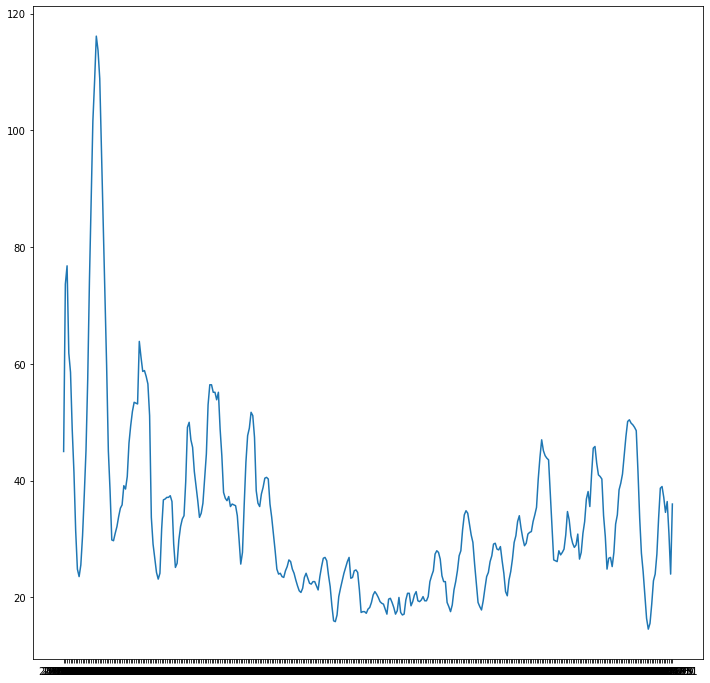

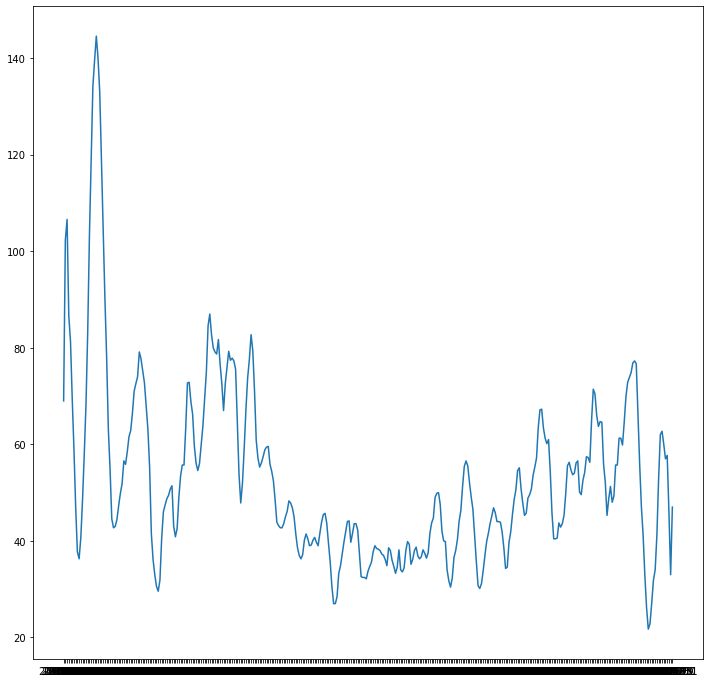

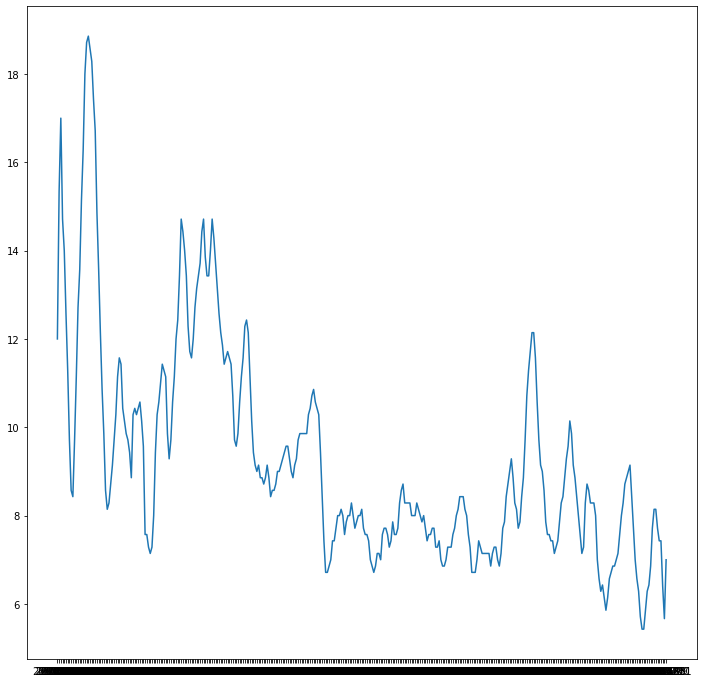

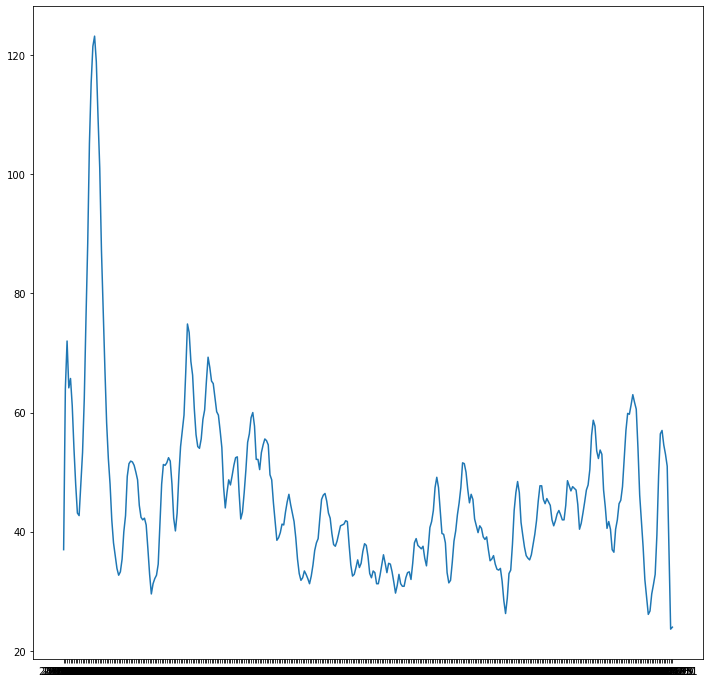

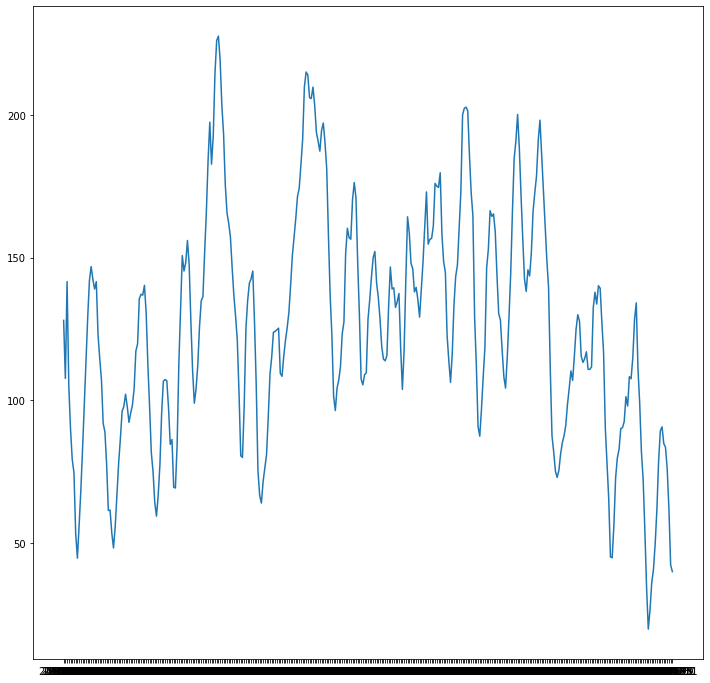

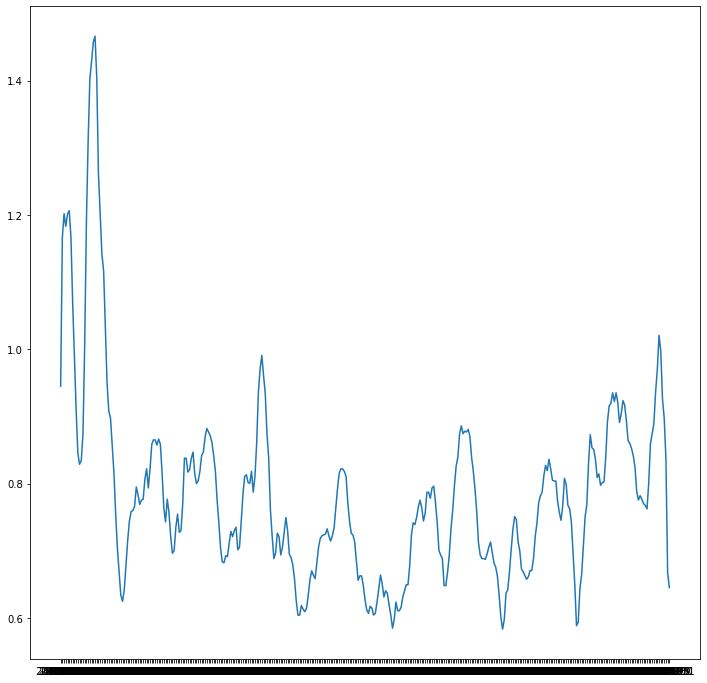

In [60]:
plt.figure(figsize=(12,12))
plt.plot(data2.index,data2AQI_mean)
plt.figure(figsize=(12,12))
plt.plot(data2.index,data2PM25_24h_mean)
plt.figure(figsize=(12,12))
plt.plot(data2.index,data2PM10_24h_mean)
plt.figure(figsize=(12,12))
plt.plot(data2.index,data2SO2_24h_mean)
plt.figure(figsize=(12,12))
plt.plot(data2.index,data2NO2_24h_mean)
plt.figure(figsize=(12,12))
plt.plot(data2.index,data2O3_24h_mean)
plt.figure(figsize=(12,12))
plt.plot(data2.index,data2CO_24h_mean)

### 18年数据 各项指标平均值

In [66]:
data2018=data2.mean().reset_index().rename(columns={0:'2018'})

In [68]:
path='./data2017/'
files=os.listdir(path)
data=pd.DataFrame()

In [69]:
for file in files:
    tmp=pd.read_csv(path+file)
    name=file.split('.')[0].split('_')[2]
    data[name]=tmp['广州']

In [71]:
tmp=pd.read_csv('./data2017/china_cities_20170101.csv')
data.index=tmp['type']
data1=data.T
data.head()

,20170101,20170102,20170103,20170104,20170105,20170106,20170107,20170108,20170109,20170110,...,20171222,20171223,20171224,20171225,20171226,20171227,20171228,20171229,20171230,20171231
type,,,,,,,,,,,,,,,,,,,,,
AQI,119.0,143.0,141.0,128.0,192.0,203.0,100.0,119.0,56.0,78.0,...,100.0,122.0,128.0,64.0,105.0,120.0,106.0,124.0,104.0,28.0
PM2.5,89.0,109.0,107.0,97.0,144.0,152.0,75.0,89.0,37.0,55.0,...,68.0,92.0,97.0,45.0,78.0,90.0,79.0,93.0,77.0,19.0
PM2.5_24h,58.0,80.0,87.0,91.0,85.0,149.0,89.0,64.0,61.0,36.0,...,35.0,63.0,82.0,63.0,61.0,69.0,80.0,89.0,74.0,60.0
PM10,166.0,165.0,187.0,165.0,212.0,242.0,140.0,150.0,59.0,103.0,...,149.0,170.0,165.0,73.0,134.0,152.0,121.0,115.0,104.0,25.0
PM10_24h,93.0,119.0,137.0,140.0,122.0,204.0,133.0,97.0,94.0,57.0,...,61.0,108.0,130.0,98.0,87.0,111.0,116.0,118.0,92.0,75.0


In [73]:
data2=data1.iloc[:,[0,2,4,6,8,10,14]]

In [75]:
data2.head()

type,AQI,PM2.5_24h,PM10_24h,SO2_24h,NO2_24h,O3_24h,CO_24h
20170101,119.0,58.0,93.0,16.0,85.0,139.0,1.110
20170102,143.0,80.0,119.0,15.0,97.0,152.0,1.436
20170103,141.0,87.0,137.0,14.0,116.0,159.0,1.573
20170104,128.0,91.0,140.0,18.0,109.0,202.0,1.500
20170105,192.0,85.0,122.0,15.0,96.0,141.0,1.155


In [76]:
data2.dropna(how='any',inplace=True)

D:\Anaconda3\envs\Keras\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
data2017=data2.mean().reset_index().rename(columns={0:'2017'})

In [81]:
path='./data2016/'
files=os.listdir(path)
data=pd.DataFrame()

for file in files:
    tmp=pd.read_csv(path+file)
    name=file.split('.')[0].split('_')[2]
    data[name]=tmp['广州']
    
tmp=pd.read_csv('./data2016/china_cities_20160101.csv')
data.index=tmp['type']
data1=data.T

data2=data1.iloc[:,[0,2,4,6,8,10,14]]

data2.dropna(how='any',inplace=True)

data2016=data2.mean().reset_index().rename(columns={0:'2016'})

D:\Anaconda3\envs\Keras\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [83]:
path='./data2015/'
files=os.listdir(path)
data=pd.DataFrame()

for file in files:
    tmp=pd.read_csv(path+file)
    name=file.split('.')[0].split('_')[2]
    data[name]=tmp['广州']
    
tmp=pd.read_csv('./data2015/china_cities_20150102.csv')
data.index=tmp['type']
data1=data.T

data2=data1.iloc[:,[0,2,4,6,8,10,14]]

data2.dropna(how='any',inplace=True)

data2015=data2.mean().reset_index().rename(columns={0:'2015'})

D:\Anaconda3\envs\Keras\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [193]:
data=pd.DataFrame()

In [194]:
data['type']=data2015['type']
data['2015']=data2015['2015']
data['2016']=data2016['2016']
data['2017']=data2017['2017']
data['2018']=data2018['2018']

In [195]:
data

,type,2015,2016,2017,2018
0,AQI,60.134986,56.572603,57.258242,55.870423
1,PM2.5_24h,38.024793,34.572603,34.472527,33.692958
2,PM10_24h,59.385675,55.063014,55.615385,52.861972
3,SO2_24h,12.187328,11.235616,11.217033,9.281690
4,NO2_24h,44.179063,43.487671,49.131868,45.873239
5,O3_24h,111.683196,111.657534,122.002747,125.476056
6,CO_24h,0.956581,0.944071,0.867596,0.786606


In [196]:
data.rename(index={0:'AQI',1:'PM2.5_24h',2:'PM10_24h',3:'SO2_24h',4:'NO2_24h',5:'O3_24h',6:'CO_24h'},inplace=True)

In [197]:
data.drop(['type'],axis=1,inplace=True)

In [198]:
data=data.T

In [199]:
data

,AQI,PM2.5_24h,PM10_24h,SO2_24h,NO2_24h,O3_24h,CO_24h
2015,60.134986,38.024793,59.385675,12.187328,44.179063,111.683196,0.956581
2016,56.572603,34.572603,55.063014,11.235616,43.487671,111.657534,0.944071
2017,57.258242,34.472527,55.615385,11.217033,49.131868,122.002747,0.867596
2018,55.870423,33.692958,52.861972,9.281690,45.873239,125.476056,0.786606


## 对每个指标画图

Text(0.5, 0, 'year')

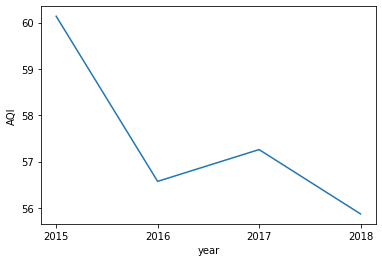

In [114]:
'''AQI'''

plt.plot(data.index,data['AQI'])
plt.ylabel('AQI')
plt.xlabel('year')

Text(0.5, 0, 'year')

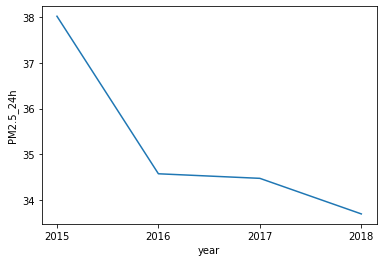

In [115]:
'''PM2.5_24h'''

plt.plot(data.index,data['PM2.5_24h'])
plt.ylabel('PM2.5_24h')
plt.xlabel('year')

Text(0.5, 0, 'year')

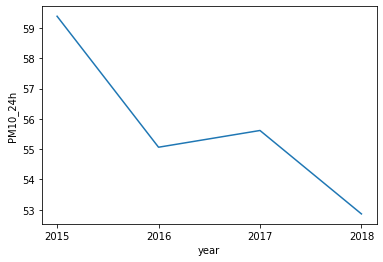

In [116]:
'''PM10_24h'''

plt.plot(data.index,data['PM10_24h'])
plt.ylabel('PM10_24h')
plt.xlabel('year')

Text(0.5, 0, 'year')

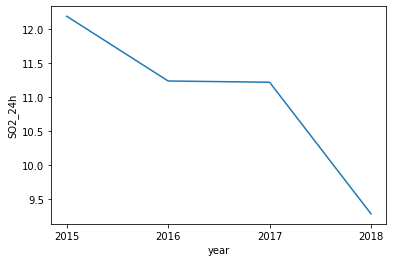

In [117]:
'''SO2_24h'''

plt.plot(data.index,data['SO2_24h'])
plt.ylabel('SO2_24h')
plt.xlabel('year')

Text(0.5, 0, 'year')

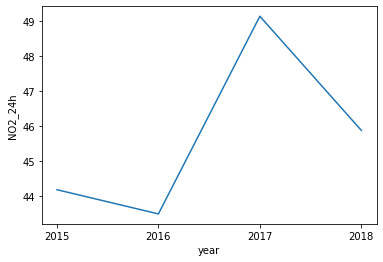

In [118]:
'''NO2_24h'''

plt.plot(data.index,data['NO2_24h'])
plt.ylabel('NO2_24h')
plt.xlabel('year')

Text(0.5, 0, 'year')

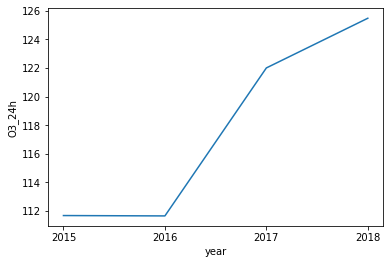

In [119]:
'''O3_24h'''

plt.plot(data.index,data['O3_24h'])
plt.ylabel('O3_24h')
plt.xlabel('year')

Text(0.5, 0, 'year')

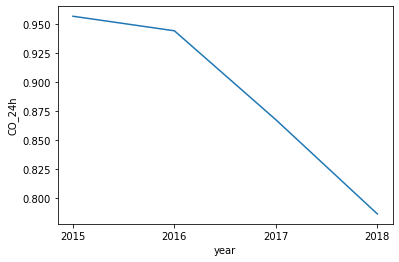

In [120]:
'''CO_24h'''

plt.plot(data.index,data['CO_24h'])
plt.ylabel('CO_24h')
plt.xlabel('year')

### 灰色预测

In [157]:
def GM11(x0): # 自定义灰色预测函数
    import numpy as np
    x1 = x0.cumsum() #1-AGO序列
    z1 = (x1[:len(x1)-1] + x1[1:])/2.0 #紧邻均值（MEAN）生成序列
    z1 = z1.reshape((len(z1),1))
    B = np.append(-z1, np.ones_like(z1), axis = 1)
    Yn = x0[1:].reshape((len(x0)-1, 1))
    [[a],[b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Yn) #计算参数
    f = lambda k: (x0[0]-b/a)*np.exp(-a*(k-1))-(x0[0]-b/a)*np.exp(-a*(k-2)) #还原值
    delta = np.abs(x0 - np.array([f(i) for i in range(1,len(x0)+1)]))
    C = delta.std()/x0.std()
    P = 1.0*(np.abs(delta - delta.mean()) < 0.6745*x0.std()).sum()/len(x0)
    return f, a, b, x0[0], C, P #返回灰色预测函数、a、b、首项、方差比、小残差概率

In [164]:
data

,AQI,PM2.5_24h,PM10_24h,SO2_24h,NO2_24h,O3_24h,CO_24h
2015,60.134986,38.024793,59.385675,12.187328,44.179063,111.683196,0.956581
2016,56.572603,34.572603,55.063014,11.235616,43.487671,111.657534,0.944071
2017,57.258242,34.472527,55.615385,11.217033,49.131868,122.002747,0.867596
2018,55.870423,33.692958,52.861972,9.281690,45.873239,125.476056,0.786606


In [210]:
data.loc['2019',:]=None
data.loc['2020',:]=None

In [211]:
data

,AQI,PM2.5_24h,PM10_24h,SO2_24h,NO2_24h,O3_24h,CO_24h
2015,60.134986,38.024793,59.385675,12.187328,44.179063,111.683196,0.956581
2016,56.572603,34.572603,55.063014,11.235616,43.487671,111.657534,0.944071
2017,57.258242,34.472527,55.615385,11.217033,49.131868,122.002747,0.867596
2018,55.870423,33.692958,52.861972,9.281690,45.873239,125.476056,0.786606
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
columns=['AQI','PM2.5_24h','PM10_24h','SO2_24h','NO2_24h','O3_24h','CO_24h']
for column in columns:
    f=GM11(np.array(data.loc[['2015','2016','2017','2018'],column]))[0]
    data.loc['2019',column]=f(5)
    data.loc['2020',column]=f(6)

## 最终预测结果

In [216]:
data

,AQI,PM2.5_24h,PM10_24h,SO2_24h,NO2_24h,O3_24h,CO_24h
2015,60.134986,38.024793,59.385675,12.187328,44.179063,111.683196,0.956581
2016,56.572603,34.572603,55.063014,11.235616,43.487671,111.657534,0.944071
2017,57.258242,34.472527,55.615385,11.217033,49.131868,122.002747,0.867596
2018,55.870423,33.692958,52.861972,9.281690,45.873239,125.476056,0.786606
2019,55.872593,33.378167,52.369011,8.815793,48.521562,134.025821,0.719913
2020,55.528984,32.953634,51.332811,8.060510,49.751164,141.908737,0.657448
